In [1]:
import time
import numpy as np
from BLP import BLP
from data_cleaning import Data 

# Part 2: BLP

In [2]:
data_loader = Data('docs/Python_codes/')
data_loader.load_data()

[ 0.5 -0.5  0.5]
['# of iterations for delta convergence: ', 75]
fval: 9017.960092305211
[ 0.525 -0.5    0.5  ]
['# of iterations for delta convergence: ', 4]
fval: 9017.96747410544
[ 0.5   -0.525  0.5  ]
['# of iterations for delta convergence: ', 45]
fval: 9881.08262039582
[ 0.5   -0.5    0.525]
['# of iterations for delta convergence: ', 45]
fval: 9033.780645313369
[ 0.51666667 -0.475       0.51666667]
['# of iterations for delta convergence: ', 43]
fval: 8208.433895281176
[ 0.525 -0.45   0.525]
['# of iterations for delta convergence: ', 43]
fval: 7436.787792850884
[ 0.53333333 -0.46666667  0.49166667]
['# of iterations for delta convergence: ', 41]
fval: 7929.465732081234
[ 0.51388889 -0.44444444  0.51111111]
['# of iterations for delta convergence: ', 42]
fval: 7262.028734497735
[ 0.50833333 -0.41666667  0.51666667]
['# of iterations for delta convergence: ', 43]
fval: 6464.8156054502315
[ 0.54444444 -0.38888889  0.52222222]
['# of iterations for delta convergence: ', 42]
fval: 5

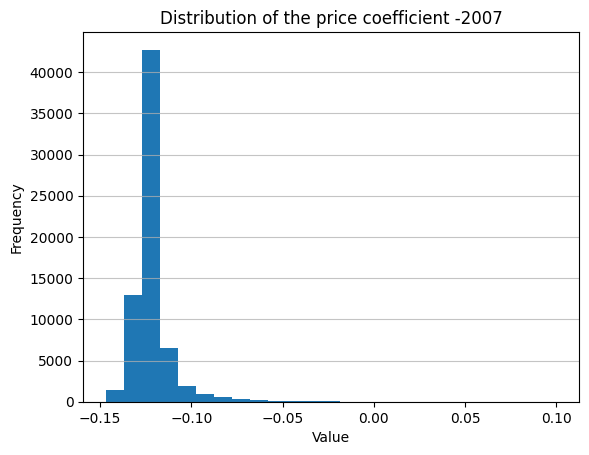

In [3]:
starttime = time.time()

#maximum number of iterations for convergence of mval-mvalold contraction
niter = 2500

#initial guess for coefficients
theta2w = np.array([0.50,-0.5,0.5])
#theta2w = np.array([0.20,-0.01,0.01,-0.5,0.05,0.05])

#maximum tolerance
mtol= 1e-5

#set optimization options
options={'disp': None,'maxiter': 100,'xatol':0.0001,'fatol':0.0001}

#get output
blp = BLP(data_loader,theta2w,mtol,niter)
init_theta = blp.init_theta(theta2w)
res = blp.iterate_optimization(opt_func=blp.gmmobj,param_vec=init_theta,jac=blp.gradobj,options=options)
blp.results(res)

endtime=time.time()
run = endtime-starttime
print('running time: ' + str(endtime-starttime))
a=time.time()

## Bonus
#### Derivative based algorithm

Object vcov dimensions: (22, 22)
Object se dimensions: (22,)
Object theta2w dimensions:     (3,)
Object t dimensions:     ()
Optimum value of the GMM objective function: 9018.216270846347


/Users/andreadonazzan/PycharmProjects/Empirical-IO-Computational-Assignment/BLP.py:318: RuntimeWarning: divide by zero encountered in divide
  denom1 = 1. / (1. + sum2)


this is the gradient [[ 4.99862326e+00]
 [ 3.36617797e+04]
 [-6.10715432e+02]]
running time: 23.91915488243103


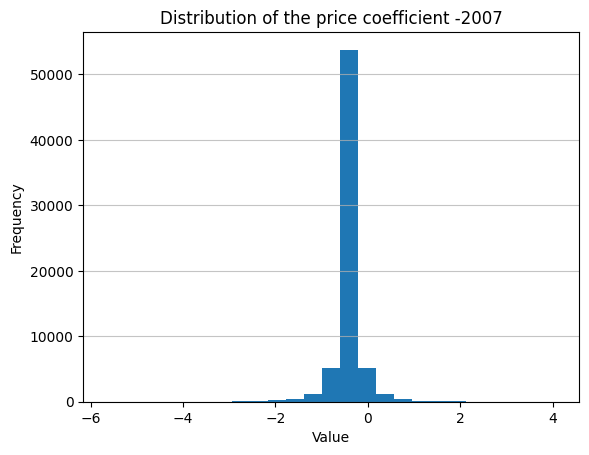

In [5]:
gradient_list = []

starttime = time.time()
niter = 2500

#initial guess for coefficients
theta2w = np.array([0.50,-0.5,0.5])

#maximum tolerance
mtol= 1e-5

# Options for L-BFGS-B
options={'disp': None,'maxiter': 100,'gtol': 1e-5}

#get output
blp = BLP(data_loader,theta2w,mtol,niter,method='L-BFGS-B')
init_theta = blp.init_theta(theta2w)
res = blp.iterate_optimization(opt_func=blp.gmmobj,param_vec=init_theta,jac=blp.gradobj,options=options)
blp.results(res)
gradient_list.append(blp.gradobj(res))

endtime=time.time()
print('running time: ' + str(endtime-starttime))

#### Different initial guesses

Object vcov dimensions: (22, 22)
Object se dimensions: (22,)
Object theta2w dimensions:     (3,)
Object t dimensions:     ()
Optimum value of the GMM objective function: 9018.216270846347


/Users/andreadonazzan/PycharmProjects/Empirical-IO-Computational-Assignment/BLP.py:318: RuntimeWarning: divide by zero encountered in divide
  denom1 = 1. / (1. + sum2)


this is the gradient [[ 4.99862326e+00]
 [ 3.36617797e+04]
 [-6.10715432e+02]]
Object vcov dimensions: (22, 22)
Object se dimensions: (22,)
Object theta2w dimensions:     (3,)
Object t dimensions:     ()
Optimum value of the GMM objective function: 742.7398893451948
this is the gradient [[  3.33393406]
 [-99.83722591]
 [  9.78282519]]
Object vcov dimensions: (22, 22)
Object se dimensions: (22,)
Object theta2w dimensions:     (3,)
Object t dimensions:     ()
Optimum value of the GMM objective function: 5786.973904456505


/Users/andreadonazzan/PycharmProjects/Empirical-IO-Computational-Assignment/BLP.py:318: RuntimeWarning: divide by zero encountered in divide
  denom1 = 1. / (1. + sum2)


this is the gradient [[ 2.31215848e+00]
 [ 2.63752126e+04]
 [-2.96192695e+02]]
Object vcov dimensions: (22, 22)
Object se dimensions: (22,)
Object theta2w dimensions:     (3,)
Object t dimensions:     ()
Optimum value of the GMM objective function: 1008.1936244423953
this is the gradient [[-4.62540986e-01]
 [ 5.57005302e+03]
 [-1.86115216e+02]]


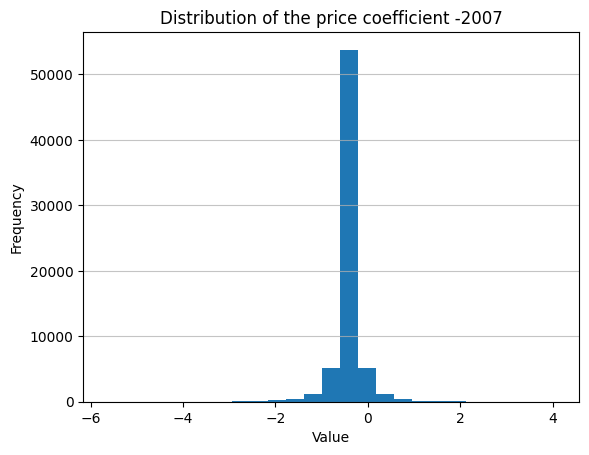

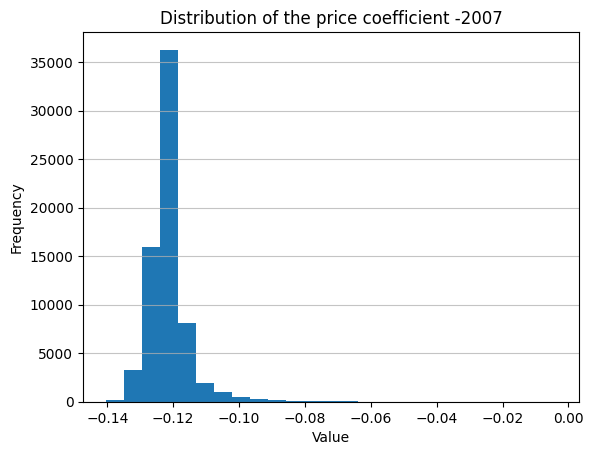

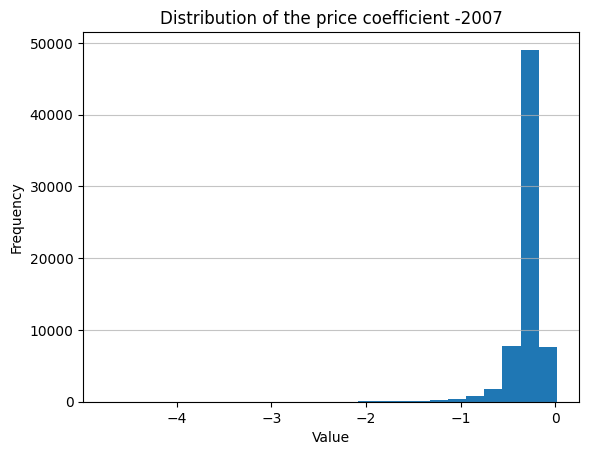

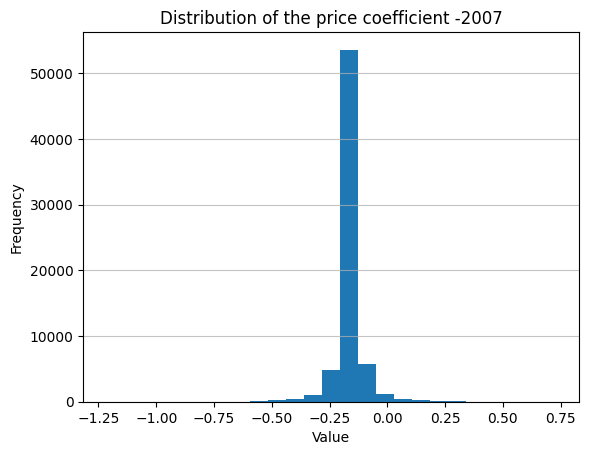

In [6]:
initial_guesses = [
    np.array([-0.20,0.01,0.01]),
    np.array([0.20,-0.40,0.01]),
    np.array([0.60,-0.10,0.10]),
    np.array([0.10,-0.60,0.40]),
    np.array([0.10,-0.10,-0.50])
]

niter = 2500
mtol= 1e-5
options={'disp': None,'maxiter': 100,'gtol': 1e-5}

results_list = []
for theta0 in initial_guesses:
    blp = BLP(data_loader,theta0,mtol,niter,method='L-BFGS-B')
    init_theta = blp.init_theta(theta0)
    res = blp.iterate_optimization(opt_func=blp.gmmobj,param_vec=init_theta,jac=blp.gradobj,options=options)
    blp.results(res)
    results_list.append(blp.fval_results)
    gradient_list.append(blp.gradobj(res))

In [7]:
results_list

[np.float64(9018.216270846347),
 np.float64(742.7398893451948),
 np.float64(5786.973904456505),
 np.float64(1008.1936244423953)]

#### Increased tolerace of contraction mapping

In [ ]:
niter = 2500
mtol = 1e-10

#initial guess for coefficients
theta2w = np.array([0.50,-0.5,0.5])

# Options for L-BFGS-B
options={'disp': None,'maxiter': 100,'gtol': 1e-5}

#get output
blp = BLP(data_loader,theta2w,mtol,niter,method='L-BFGS-B')
init_theta = blp.init_theta(theta2w)
res = blp.iterate_optimization(opt_func=blp.gmmobj,param_vec=init_theta,jac=blp.gradobj,options=options)
blp.results(res)